# Combined Data Cleaning 
This notebook focuses on final cleaning and enhancement of the merged rental listings dataset.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Combined Dataset

In [3]:
combined = pd.read_csv('cleaned_combined_listings.csv')
# Preview the combined data
combined.info()
combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5297 entries, 0 to 5296
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      5297 non-null   object 
 1   price      4345 non-null   float64
 2   location   5197 non-null   object 
 3   area       4548 non-null   float64
 4   bathrooms  4228 non-null   float64
 5   bedrooms   4142 non-null   float64
dtypes: float64(4), object(2)
memory usage: 248.4+ KB


,title,price,location,area,bathrooms,bedrooms
0,ADV905*4BHK Villa for rent in Madinat Illam in...,750.0,"Qurum, Muscat•",300.0,4.0,4.0
1,ADV906**4BHK Villa in a comples in shatti qurum,1900.0,"Qurum, Muscat•",300.0,4.0,4.0
2,ADC507*** Office Space in Azaiba – 440 sqm for...,2310.0,"Azaiba, Muscat•",440.0,NaN,NaN
3,*ADV705** 3+1 BHK Villa for Rent in Bousher –A...,650.0,"Bosher, Muscat•",350.0,4.0,3.0
4,4 BR + Maid’s Room Spacious Well-Designed Vill...,750.0,"Azaiba, Muscat•",439.0,5.0,4.0


## 3. Initial Overview

In [4]:
# Summary statistics for numerical columns
combined.describe()

,price,area,bathrooms,bedrooms
count,4345.000000,4548.000000,4228.000000,4142.000000
mean,1067.301952,3040.063771,2.906575,2.586432
std,9308.506300,44332.083252,2.019546,1.761193
min,0.000000,1.000000,0.000000,1.000000
25%,120.000000,67.000000,1.000000,1.000000
50%,340.000000,120.000000,2.000000,2.000000
75%,750.000000,300.000000,4.000000,4.000000
max,500000.000000,1000000.000000,24.000000,27.000000


In [5]:
# Check missing values by column
missing = combined.isna().sum()
print('Missing values per column:')
print(missing)

Missing values per column:
title           0
price         952
location      100
area          749
bathrooms    1069
bedrooms     1155
dtype: int64


## 4. Handle Missing Values

In [6]:
# Drop rows with missing price or area, as these are critical
overall = combined.dropna(subset=['price', 'area'])

# Impute bedrooms and bathrooms with median
med_bed = overall['bedrooms'].median()
med_bath = overall['bathrooms'].median()
overall['bedrooms'].fillna(med_bed, inplace=True)
overall['bathrooms'].fillna(med_bath, inplace=True)

print(f"Imputed missing bedrooms with {med_bed} and bathrooms with {med_bath}.")

Imputed missing bedrooms with 2.0 and bathrooms with 2.0.


C:\Users\DuaaHilal\AppData\Local\Temp\ipykernel_21004\1511046229.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  overall['bedrooms'].fillna(med_bed, inplace=True)
C:\Users\DuaaHilal\AppData\Local\Temp\ipykernel_21004\1511046229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall['bedrooms'].fillna(med_bed, inplace=True)
C:\Users\Du

## 5. Filter Outliers

In [7]:
# Remove non-positive and extreme outliers based on price per area ratio
overall = overall[(overall['price'] > 0) & (overall['area'] > 0)]

# Compute price per sqm
overall['price_per_sqm'] = overall['price'] / overall['area']

# Filter values outside the 1st and 99th percentile
lower, upper = overall['price_per_sqm'].quantile([0.01, 0.99])
overall = overall[(overall['price_per_sqm'] >= lower) & (overall['price_per_sqm'] <= upper)]
print(f"Filtered price_per_sqm outside {lower:.2f} to {upper:.2f}.")

Filtered price_per_sqm outside 0.01 to 50.00.


## 6. Standardize Text Fields

In [8]:
# Uniform title casing for locations
overall['location'] = overall['location'].str.strip().str.title()

# Clean extra whitespace in titles
overall['title'] = overall['title'].str.strip()

## 7. Final Dataset & Export

In [10]:
overall.to_csv('final_cleaned_listings.csv', index=False)
print('Final cleaned dataset saved to final_cleaned_listings.csv')
overall.head()

Final cleaned dataset saved to final_cleaned_listings.csv


,title,price,location,area,bathrooms,bedrooms,price_per_sqm
0,ADV905*4BHK Villa for rent in Madinat Illam in...,750.0,"Qurum, Muscat•",300.0,4.0,4.0,2.500000
1,ADV906**4BHK Villa in a comples in shatti qurum,1900.0,"Qurum, Muscat•",300.0,4.0,4.0,6.333333
2,ADC507*** Office Space in Azaiba – 440 sqm for...,2310.0,"Azaiba, Muscat•",440.0,2.0,2.0,5.250000
3,*ADV705** 3+1 BHK Villa for Rent in Bousher –A...,650.0,"Bosher, Muscat•",350.0,4.0,3.0,1.857143
4,4 BR + Maid’s Room Spacious Well-Designed Vill...,750.0,"Azaiba, Muscat•",439.0,5.0,4.0,1.708428


## 8. Basic Visualization 

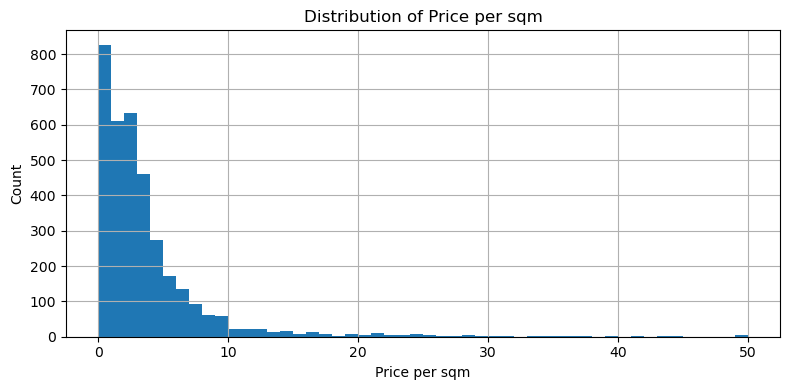

In [11]:
plt.figure(figsize=(8,4))
overall['price_per_sqm'].hist(bins=50)
plt.title('Distribution of Price per sqm')
plt.xlabel('Price per sqm')
plt.ylabel('Count')
plt.tight_layout()
plt.show()